In [9]:
import pandas as pd

df = pd.read_csv('/content/ai_job_market_insights_edited.csv')

df = df[df['Job_Growth_Projection'] != 'Stable']

df.to_csv('cleaned_file.csv', index=False)

In [ ]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.16520,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Low,High,Marketing,93792.56247,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.26310,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,High,High,Project Management,93027.95376,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.92217,Yes,Decline


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv('/content/job_cleaned_file.csv')
# Select features and target variable
features = data.drop(columns=["Job_Title", "Job_Growth_Projection"])
target = data["Job_Growth_Projection"]

# Encode categorical variables
label_encoders = {}
for column in features.select_dtypes(include="object").columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

target_le = LabelEncoder()
target = target_le.fit_transform(target)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=target_le.classes_)
print(report)

              precision    recall  f1-score   support

     Decline       0.78      0.76      0.77        41
      Growth       0.70      0.72      0.71        32

    accuracy                           0.74        73
   macro avg       0.74      0.74      0.74        73
weighted avg       0.74      0.74      0.74        73



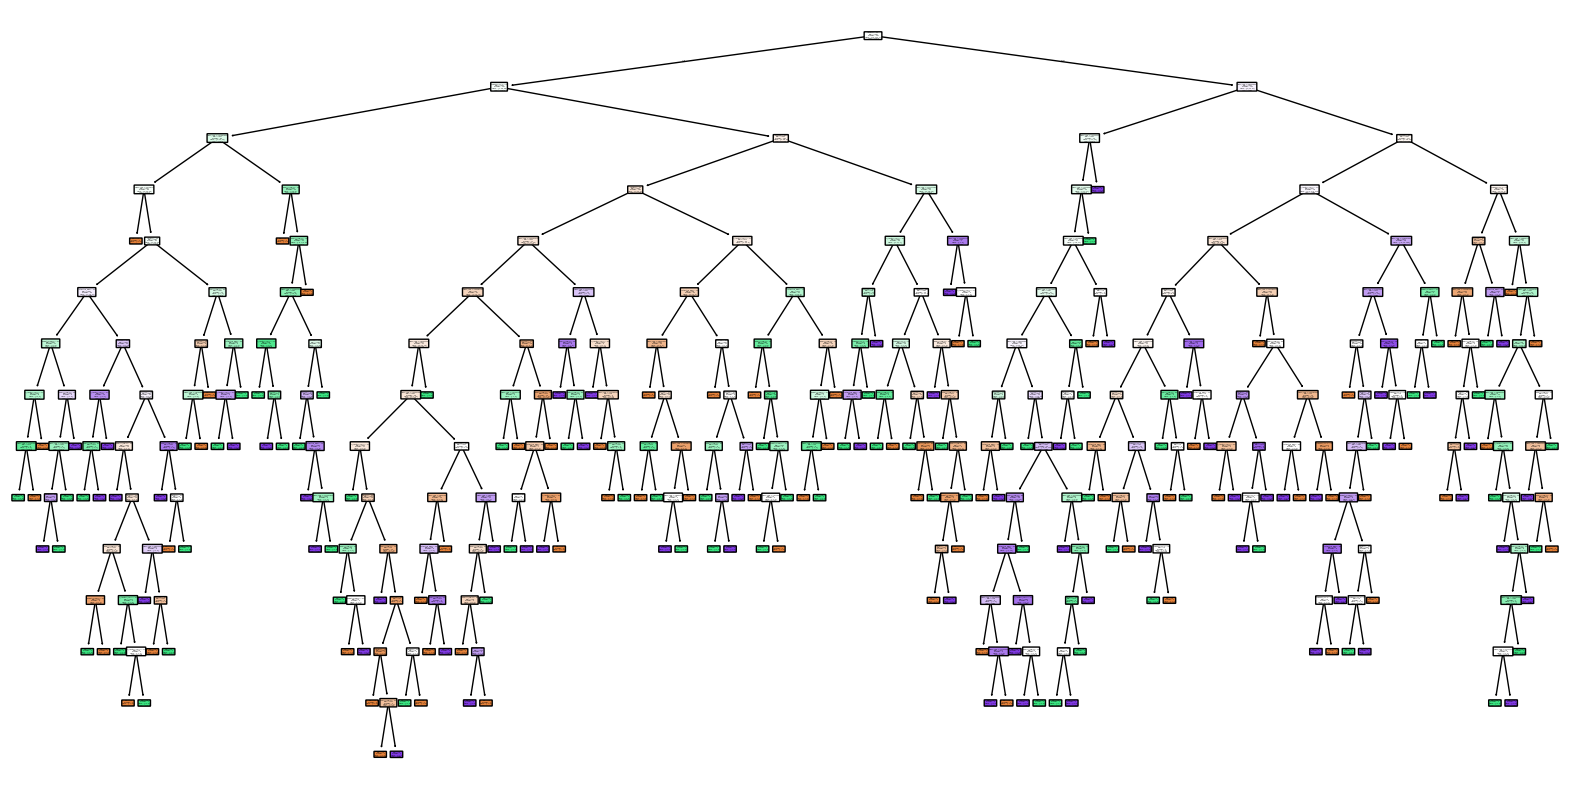

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features.columns, class_names=target_le.classes_, filled=True, rounded=True)
plt.show()


In [22]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/job_cleaned_file.csv')

features = data.drop(columns=["Job_Title", "Job_Growth_Projection"])
target = data["Job_Growth_Projection"]

label_encoders = {}
for column in features.select_dtypes(include="object").columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

target_le = LabelEncoder()
target = target_le.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf, target_names=target_le.classes_)
print(report_rf)


              precision    recall  f1-score   support

     Decline       0.82      0.88      0.85        41
      Growth       0.83      0.75      0.79        32

    accuracy                           0.82        73
   macro avg       0.82      0.81      0.82        73
weighted avg       0.82      0.82      0.82        73



<ipython-input-13-ad38492efc59>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=feature_names, palette="viridis")


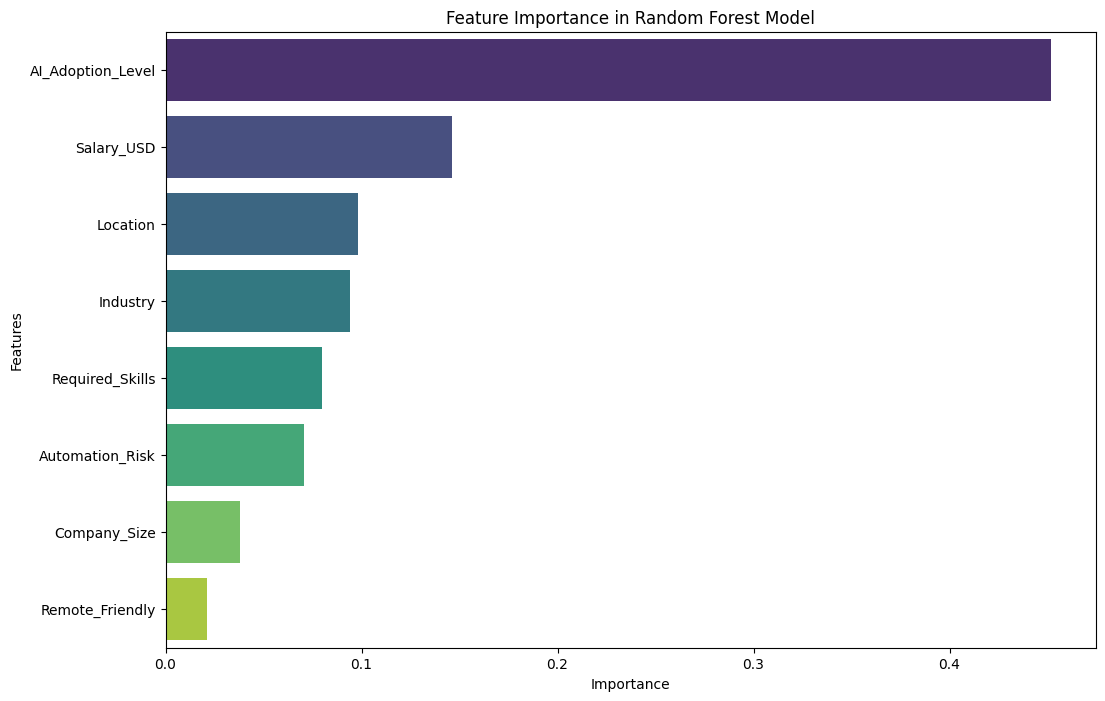

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names = features.columns[indices]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[indices], y=feature_names, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('/content/job_cleaned_file.csv')

X = data.drop(columns=['Job_Growth_Projection'])  # Drop the target column from the features
y = data['Job_Growth_Projection']  # Define target variable

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9178082191780822
Classification Report:
               precision    recall  f1-score   support

     Decline       0.83      1.00      0.91        29
      Growth       1.00      0.86      0.93        44

    accuracy                           0.92        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.93      0.92      0.92        73

Confusion Matrix:
 [[29  0]
 [ 6 38]]


<Figure size 800x600 with 0 Axes>

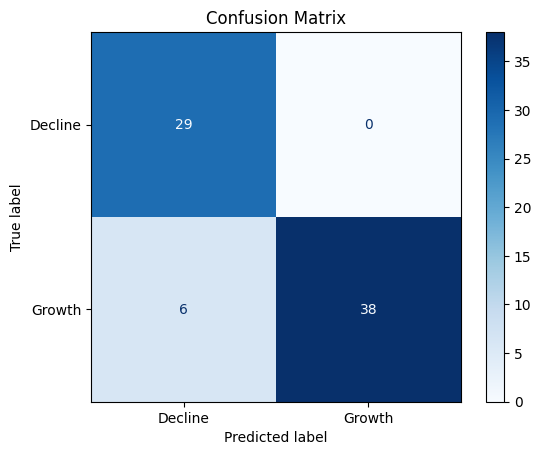

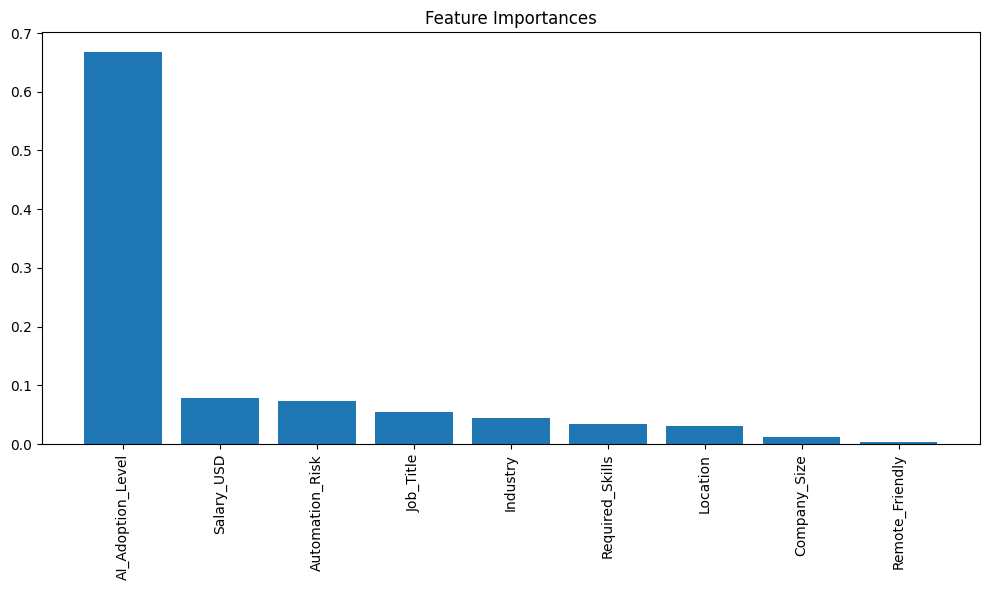

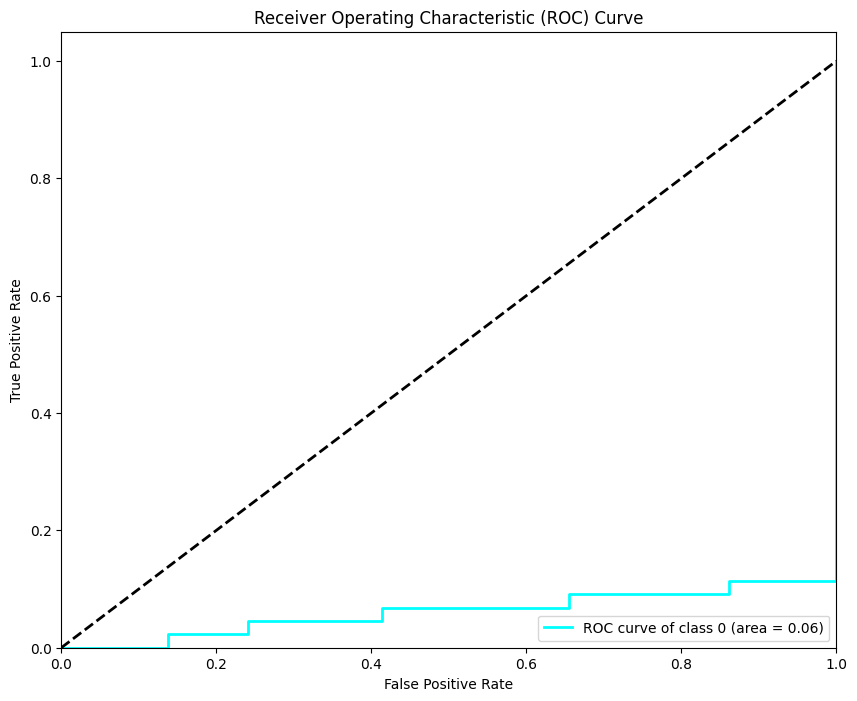

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from itertools import cycle

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkred'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()